In [11]:
from oggm import utils
import geopandas as gpd
from oggm import cfg
from oggm import tasks, utils, workflow, graphics, DEFAULT_BASE_URL, global_task
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from oggm.global_tasks import compile_ela


In [12]:
def initializa_gdir(glacier_name = 'RGI60-15.03473') :
    # Initialize OGGM and set up the default run parameters
    cfg.initialize(logging_level='WARNING')

    # Local working directory (where OGGM will write its output)
    # WORKING_DIR = utils.gettempdir('OGGM_distr4')
    cfg.PATHS['working_dir'] = utils.get_temp_dir('OGGM_distributed', reset=True)

    rgi_ids = [glacier_name]  # This is Aletsch
    gdir = workflow.init_glacier_directories(rgi_ids, prepro_base_url=DEFAULT_BASE_URL, from_prepro_level=4, prepro_border=80)[0]
    return gdir

In [18]:
def compute_ela(glacier_name='RGI60-15.03473', ys=1901, ye=2019):
    gdir = initializa_gdir(glacier_name=glacier_name)
    donnees = compile_ela(gdir, ys=ys, ye=ye)
    return donnees

In [14]:
def compute_mean_by_period(donnees, glacier_name, period = "10Y") :
    donnees = pd.DataFrame({
        'annee': [i for i in range(1901, 2020)],
        'donnees': donnees[glacier_name]
    })

    donnees['annee'] = pd.to_datetime(donnees['annee'], format='%Y')

    donnees = donnees.set_index('annee')

    moyenne_ans = donnees['donnees'].resample(period).mean()

    return moyenne_ans

2024-04-29 18:01:24: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-04-29 18:01:24: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-04-29 18:01:24: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-04-29 18:01:24: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-04-29 18:01:24: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-04-29 18:01:25: oggm.utils: Applying global task compile_ela on 1 glaciers
2024-04-29 18:01:25: oggm.workflow: Execute entity tasks [compute_ela] on 1 glaciers


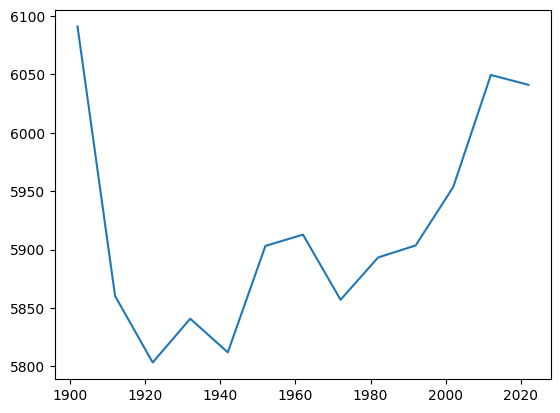

In [20]:
res = compute_mean_by_period(compute_ela('RGI60-15.03473'), 'RGI60-15.03473', "10Y")
plt.plot(res)